Importing the dependancies

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [28]:
#loading the data
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [29]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [30]:
data_frame=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)

In [79]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [80]:
#adding the target colunm to dataset
data_frame['label']=breast_cancer_dataset.target

In [81]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [82]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [35]:
data_frame.shape

(569, 31)

In [83]:
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [46]:
data_frame['label'].value_counts()

,count
label,
1,357
0,212


In [84]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [39]:
x=data_frame.drop(columns='label',axis=1)
y=data_frame['label']

In [40]:
print(x)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


In [41]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [44]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


In [53]:
#standarddized the data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_std=scalar.fit_transform(x_train)
x_test_std=scalar.transform(x_test)

0------------>Malignant/M...........
1------------>Benign/B

In [55]:
#importing tenserflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [56]:
#setting  up the layers of my neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
#compiling the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', # when the 0 and 1 -------->spare_categorical. otherwise only categorical........
              metrics=['accuracy'])

In [60]:
# training the neural network
history=model.fit(x_train_std,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5164 - loss: 0.7343 - val_accuracy: 0.5652 - val_loss: 0.6214
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7253 - loss: 0.5257 - val_accuracy: 0.8043 - val_loss: 0.4350
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8247 - loss: 0.3974 - val_accuracy: 0.9348 - val_loss: 0.3148
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8923 - loss: 0.3155 - val_accuracy: 0.9348 - val_loss: 0.2425
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9176 - loss: 0.2613 - val_accuracy: 0.9348 - val_loss: 0.1970
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9267 - loss: 0.2239 - val_accuracy: 0.9348 - val_loss: 0.1656
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9362 - loss: 0.1970 - val_accuracy: 0.9348 - val_loss: 0.1437
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9424 - loss: 0.1766 - val_accuracy: 0.9348 - val_loss

Visualizing the accuracy and loss

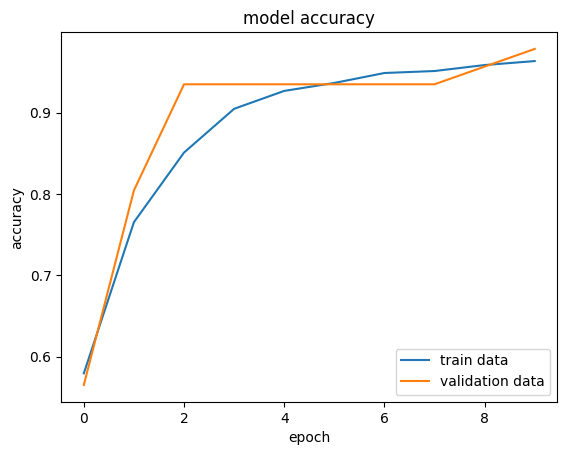

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train data','validation data'],loc='lower right')
plt.show()

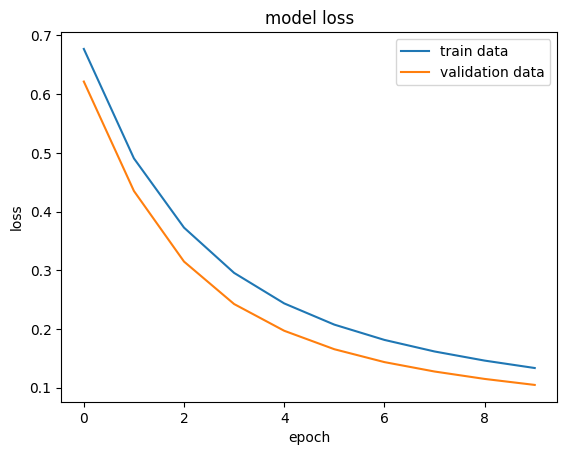

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train data','validation data'],loc='upper right')
plt.show()

Accuracy of the model on test data

In [65]:
loss,accuracy=model.evaluate(x_test_std,y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9801 - loss: 0.0944
0.9736841917037964


In [66]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[ 0.44199702  0.212229    0.42163229  0.28029849  0.46059068  0.31923771
  0.32738868  0.3980721   0.45467963  0.05268291 -0.22649032 -0.56019683
 -0.32014237 -0.19125366 -0.76043663 -0.08046584 -0.26006979 -0.51214349
 -0.33901861 -0.23280218  0.65164049  0.74215747  0.53471259  0.33156671
  1.02726691  1.30534397  0.62768506  0.50566574  1.76577066  1.29575996]


In [67]:
y_pred=model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [68]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.88335407 0.29455498]


In [69]:
print(x_test_std)

[[ 0.44199702  0.212229    0.42163229 ...  0.50566574  1.76577066
   1.29575996]
 [-0.40269822 -1.65031591 -0.45179655 ... -0.4843214  -0.18151318
   0.64044108]
 [-0.26422359 -0.43781762 -0.32110392 ... -0.9749425  -0.19430322
  -0.6222737 ]
 ...
 [ 0.20659015  0.7377986   0.40152573 ...  2.00738244 -0.03602646
   1.80285195]
 [ 1.56087203  1.33482723  1.53955686 ...  0.88712591  0.66582708
   0.08375438]
 [-0.64918307 -0.44703814 -0.67739211 ... -1.07505695  0.49795778
  -0.96887944]]


In [70]:
print(y_pred)

[[8.83354068e-01 2.94554979e-01]
 [1.75406277e-01 7.04053104e-01]
 [1.23070948e-01 8.84687424e-01]
 [9.16609243e-02 8.75595748e-01]
 [9.24642012e-02 6.80726528e-01]
 [1.22263499e-01 6.33210540e-01]
 [2.02547222e-01 9.14254069e-01]
 [2.65523106e-01 8.57437730e-01]
 [2.76965082e-01 8.81940424e-01]
 [2.09937245e-01 9.06013787e-01]
 [8.27501714e-01 2.19045341e-01]
 [9.50882912e-01 3.08758110e-01]
 [1.71129838e-01 8.74779344e-01]
 [3.69997025e-01 7.67435789e-01]
 [9.80837941e-01 5.88358194e-02]
 [3.27789366e-01 4.72881734e-01]
 [1.71419352e-01 7.51063108e-01]
 [1.19355276e-01 8.73226941e-01]
 [2.62358427e-01 8.05980623e-01]
 [2.70575881e-01 6.51438117e-01]
 [4.87037092e-01 3.78333122e-01]
 [8.66765916e-01 2.22433046e-01]
 [8.27339947e-01 4.18122336e-02]
 [2.06289381e-01 7.72959352e-01]
 [2.88121611e-01 6.21843219e-01]
 [1.27438605e-01 7.50825644e-01]
 [7.90146232e-01 4.40289497e-01]
 [9.55271244e-01 6.18386343e-02]
 [3.92850757e-01 7.20772445e-01]
 [1.15931220e-01 7.46734202e-01]
 [7.013701

model.predict gives me the prediction probablity of each class for the datapoint.

In [75]:
# argmax function
my_list=[0.56,0.53,0.30]

index_of_max_value=np.argmax(my_list)
print(index_of_max_value)

0


In [76]:
#converting the prediction probablity to class labels
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels) # 0 means first value maximum and 1 means second value is maximum

[np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0)

Building a predictive system

In [78]:
input_data=(9.029,17.33,58.79,250.5,0.1066,0.1413,0.313,0.04375,0.2111,0.08046,0.3274,1.194,1.885,17.67,0.009549,0.08606,0.3038,0.03322,0.04197,0.009559,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.175,0.4228,0.1175)

# change input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardizeding the input data
input_data_std=scalar.transform(input_data_reshaped)
print(input_data_std)

prediction=model.predict(input_data_std)
print(prediction)

prediction_label=[np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
    print('The breast cancer is Malignant')
else:
    print('The breast cancer is Benign')

[[-1.41937896 -0.46086891 -1.34010423 -1.12778564  0.75240969  0.71160984
   2.82548033 -0.13596678  1.10441901  2.46136322 -0.29758261 -0.06511112
  -0.49491368 -0.49653172  0.84257275  3.4066057   8.60901547  3.38080675
   2.5682325   2.10994786 -1.21197649 -0.50393638 -1.22256933 -0.95681489
   0.71967507  1.23001124  4.79192623  0.91426536  2.14147814  1.91430074]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[0.01424114 0.3501607 ]]
[np.int64(1)]
The breast cancer is Benign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
